In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
test = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')

In [3]:
# Prepare data
X = train.drop('label', axis=1).values / 255.0  # Normalize data
y = train['label'].values
X_test = test.drop(test.columns[0], axis=1).values / 255.0  # Normalize and remove ID if the first column is ID

# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [4]:
# Predict on training and validation set
train_preds = ada_model.predict(X_train)
val_preds = ada_model.predict(X_val)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
val_accuracy = accuracy_score(y_val, val_preds)

# Print the accuracies
print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation accuracy: {val_accuracy * 100:.2f}%")

Training accuracy: 79.43%
Validation accuracy: 79.35%


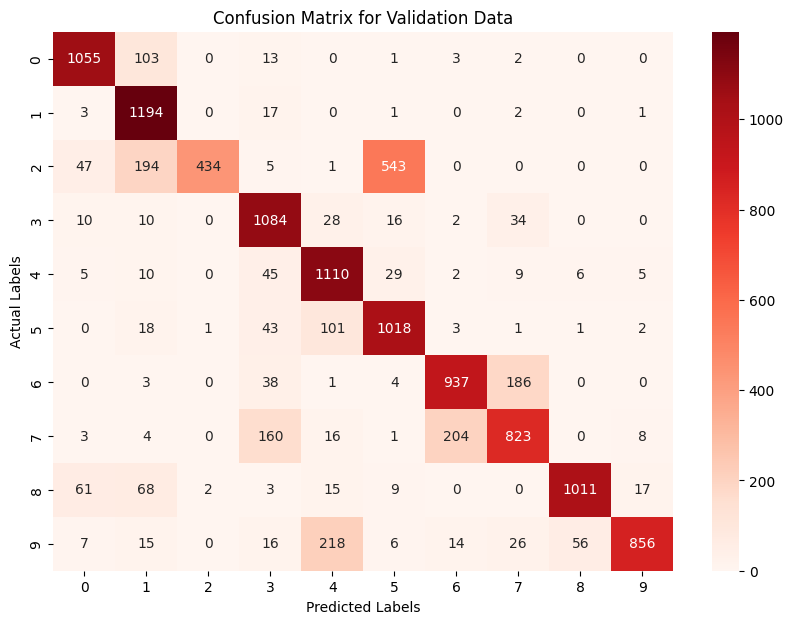

In [9]:
# Confusion matrix for the validation set
cm = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [10]:
# Predicting the test set
test_preds = ada_model.predict(X_test)

# Prepare submission
submission_df = pd.DataFrame({
    'id': test.iloc[:, 0],  # Assuming the first column is 'id'
    'label': test_preds.astype(int)
})
submission_filename = 'submission.csv'
submission_df.to_csv(submission_filename, index=False)
print("Submission file for AdaBoost created!")
print(submission_df.head())

Submission file for AdaBoost created!
   id  label
0   0      3
1   1      0
2   2      5
3   3      6
4   4      7
